### Results for LogisticRegression
Training Loss: 0.39
Training Accuracy: 85.95%
Validation Loss: 0.43
Validation Accuracy: 83.92%
Test Loss: 0.43
Test Accuracy: 85.17%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       0.00      0.00      0.00       193

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.77      1200


/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/p

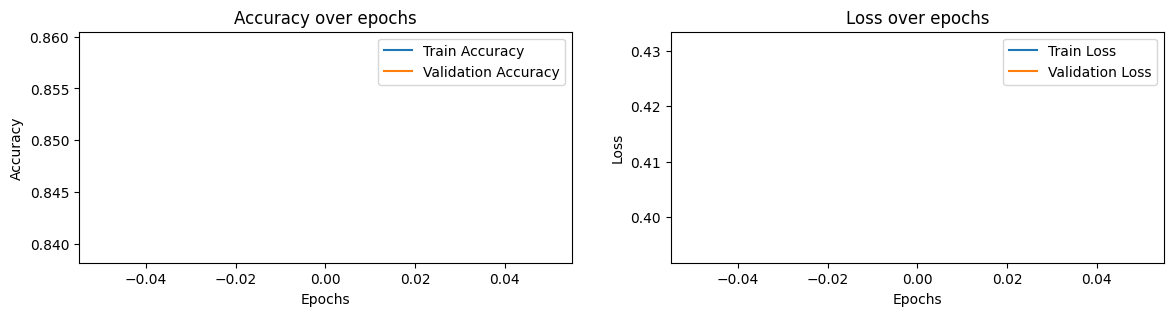

/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/andrewtwijukye/.local/share/virtualenvs/MLLabs-HkU2X8db/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

### Results for GaussianNB
Training Loss: 0.38
Training Accuracy: 85.95%
Validation Loss: 0.41
Validation Accuracy: 83.92%
Test Loss: 0.41
Test Accuracy: 85.17%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1007
           1       0.00      0.00      0.00       193

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.77      1200


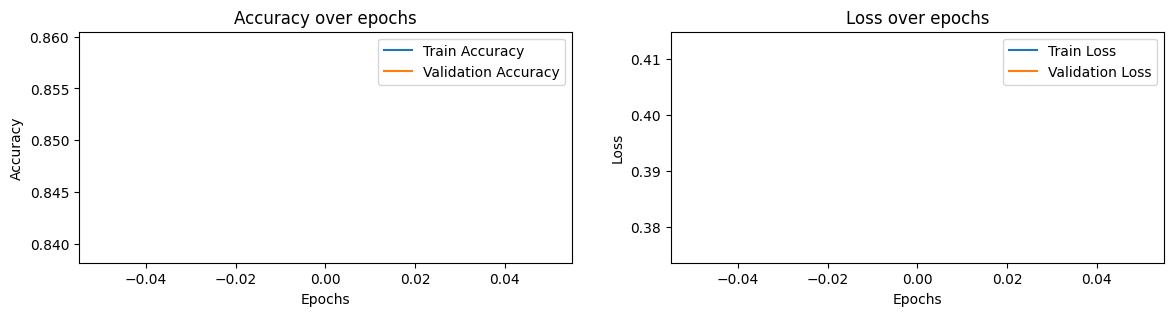

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# from sklearn import linear_model as generalized_linear_model
# from statsmodels.genmod.generalized_linear_model import GLM
from sklearn.neural_network import MLPClassifier as DeepLearning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss


def train_model_and_output_perf(md, x_train, y_train, x_val, x_test, y_val, y_test):
    md.fit(x_train, y_train)

    # Make predictions on the training set and calculate loss
    y_pred_train = md.predict(x_train)
    y_pred_train_proba = md.predict_proba(x_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_loss = log_loss(y_train, y_pred_train_proba)

    # Make predictions on the validation set and calculate loss
    y_pred_val = md.predict(x_val)
    y_pred_val_proba = md.predict_proba(x_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_loss = log_loss(y_val, y_pred_val_proba)
    
    y_pred_test = md.predict(x_test)
    y_pred_test_proba = md.predict_proba(x_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_loss = log_loss(y_val, y_pred_val_proba)
    

    print("### Results for " + md.__class__.__name__)
    # Print training and validation loss and accuracy
    print("Training Loss: %.2f" % train_loss)
    print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
    print("Validation Loss: %.2f" % val_loss)
    print("Validation Accuracy: %.2f%%" % (val_accuracy * 100.0))
    print("Test Loss: %.2f" % test_loss)
    print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

    # Print precision, recall, and F1 score for the validation set
    print(classification_report(y_val, y_pred_val))

    # Plot the accuracy for training and validation sets
    plt.figure(figsize=(14, 3))
    plt.subplot(121)
    plt.plot(train_accuracy, label="Train Accuracy")
    plt.plot(val_accuracy, label="Validation Accuracy")
    plt.legend()
    plt.title("Accuracy over epochs")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")

    # Plot the loss for training and validation sets
    plt.subplot(122)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.legend()
    plt.title("Loss over epochs")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.show()


# Load the data
df = pd.read_csv('Lab 2 Dataset.csv')

# Convert categorical variables to numeric variables
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))

# Separate features and target
X = df.drop('Response', axis=1)
y = df['Response']

# Split data into training, validation, and test sets
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, random_state=42)

# Initialize and fit the model on the training set
model = LogisticRegression(max_iter=1000)
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

model = GaussianNB()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

# model = GLM()
# train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

# model = LogisticRegression(max_iter=1000)   
# train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

# model = DeepLearning()
# train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)
# 
# model = KNeighborsClassifier()
# train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)
# 
model = LinearDiscriminantAnalysis()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

model = QuadraticDiscriminantAnalysis()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

model = GaussianProcessClassifier()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

model = AdaBoostClassifier()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

model = DecisionTreeClassifier()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)

model = XGBClassifier()
train_model_and_output_perf(model, X_train, Y_train, X_val, X_test, Y_val, Y_test)


